In [1]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

/kaggle/input/creditcardfraud/creditcard.csv


# Data Exploration

In [2]:
data=pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(0.0, 172792.0)

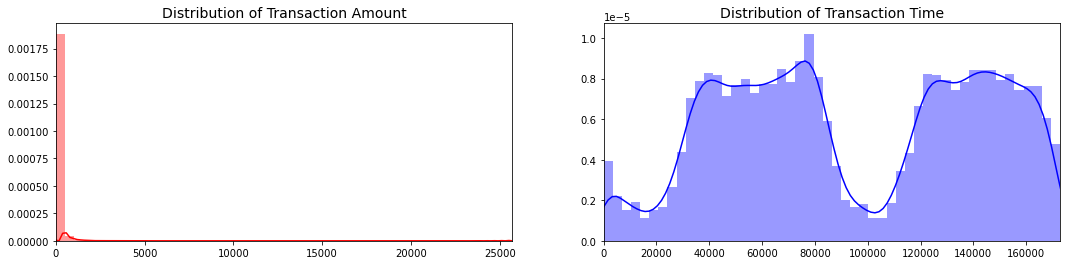

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

In [4]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [5]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [6]:
data.isnull().sum().sum()

0

In [7]:
data.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.927124,0.118914,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727
std,3.495006,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.307413,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.229162,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.770838,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,358.683155,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


# Data Visualisation

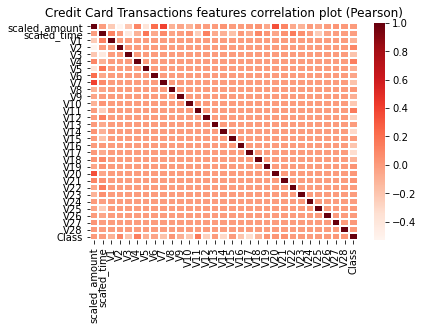

In [8]:
plt.figure()
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=1,cmap="Reds")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

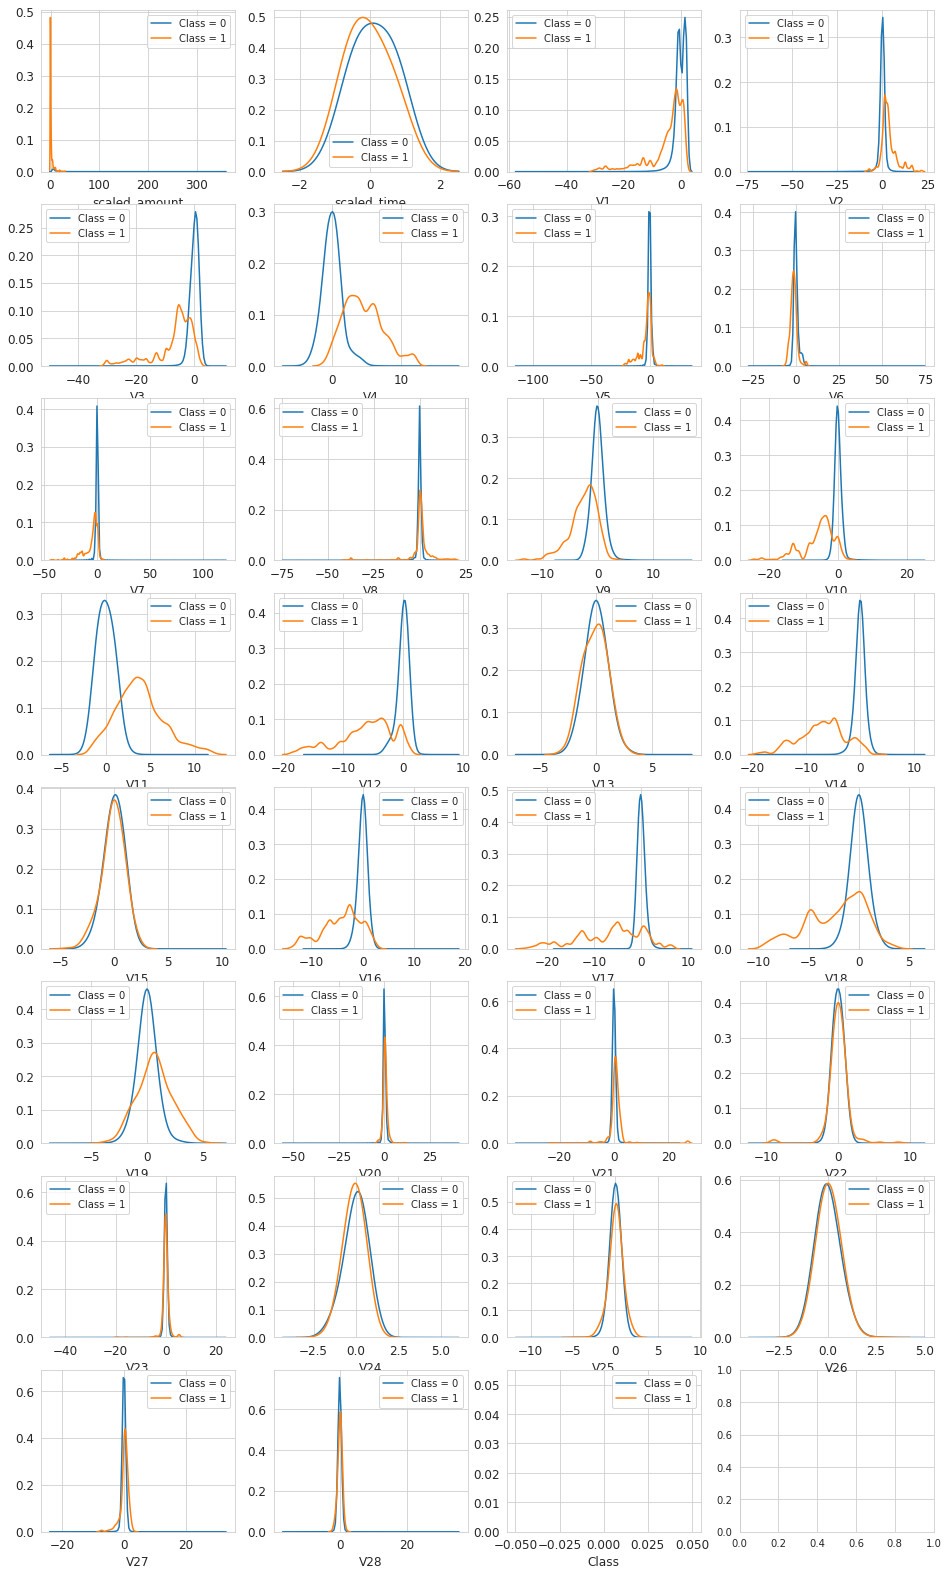

In [9]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [10]:
X=data.drop('Class',axis=1)
y=data['Class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.1)
X_train.shape, y_train.shape, X_test.shape

((256326, 30), (256326,), (28481, 30))

# Modelling

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # "Support Vector Classifier" 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [12]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [13]:
#gini_predictions = gini(y_test, y_pred)
#gini_max = gini(y_test, y_pred)
#ngini= gini_normalized(y_test, y_pred)


### Logistic Regression

In [14]:
logreg = LogisticRegression(max_iter=150)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log=accuracy_score(y_test,y_pred)
prec_log,recall_log,f1_log,support_log=precision_recall_fscore_support(y_test, y_pred, average='weighted')
log_log=log_loss(y_test,y_pred)
kappa_log=cohen_kappa_score(y_test, y_pred)
ngini_log= gini_normalized(y_test, y_pred)


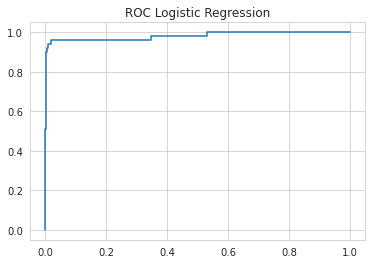

In [15]:
prob_log = logreg.predict_proba(X_test)
fpr_log, tpr_log, thresh_log = roc_curve(y_test, prob_log[:,1], pos_label=1)
random_probs_log = [0 for i in range(len(y_test))]
p_fpr_log, p_tpr_log, _ = roc_curve(y_test, random_probs_log, pos_label=1)
plt.title('ROC Logistic Regression')
plt.plot(fpr_log,tpr_log)
plt.show()
auc_log = roc_auc_score(y_test, prob_log[:,1])


### Naive Bayes Classifier

In [16]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_nb=accuracy_score(y_test,y_pred)
prec_nb,recall_nb,f1_nb,support_nb=precision_recall_fscore_support(y_test, y_pred, average='weighted')
log_nb=log_loss(y_test,y_pred)
kappa_nb=cohen_kappa_score(y_test, y_pred)
ngini_nb= gini_normalized(y_test, y_pred)

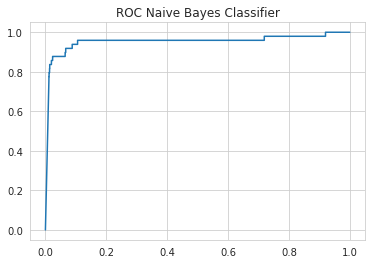

In [17]:
prob_nb = gaussian.predict_proba(X_test)
fpr_nb, tpr_nb, thresh_nb = roc_curve(y_test, prob_nb[:,1], pos_label=1)
random_probs_nb = [0 for i in range(len(y_test))]
p_fpr_nb, p_tpr_nb, _ = roc_curve(y_test, random_probs_nb, pos_label=1)
plt.title('ROC Naive Bayes Classifier')
plt.plot(fpr_nb,tpr_nb)
plt.show()
auc_nb = roc_auc_score(y_test, prob_nb[:,1])

### Stochastic Gradient Descent

In [18]:
sgd = SGDClassifier(loss='log')
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd=accuracy_score(y_test,y_pred)
prec_sgd,recall_sgd,f1_sgd,support_sgd=precision_recall_fscore_support(y_test, y_pred, average='weighted')
log_sgd=log_loss(y_test,y_pred)
kappa_sgd=cohen_kappa_score(y_test, y_pred)
ngini_sgd= gini_normalized(y_test, y_pred)

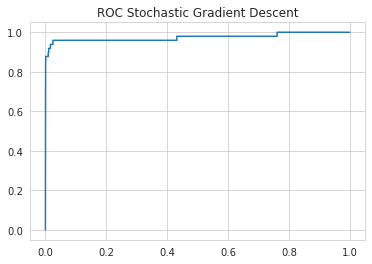

In [19]:
prob_sgd = sgd.predict_proba(X_test)
fpr_sgd, tpr_sgd, thresh_sgd = roc_curve(y_test, prob_sgd[:,1], pos_label=1)
random_probs_sgd = [0 for i in range(len(y_test))]
p_fpr_sgd, p_tpr_sgd, _ = roc_curve(y_test, random_probs_sgd, pos_label=1)
plt.title('ROC Stochastic Gradient Descent')
plt.plot(fpr_sgd,tpr_sgd)
plt.show()
auc_sgd = roc_auc_score(y_test, prob_sgd[:,1])

### Decision Tree Classifier

In [20]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_dt=accuracy_score(y_test,y_pred)
prec_dt,recall_dt,f1_dt,support_dt=precision_recall_fscore_support(y_test, y_pred, average='weighted')
log_dt=log_loss(y_test,y_pred)
kappa_dt=cohen_kappa_score(y_test, y_pred)
ngini_dt= gini_normalized(y_test, y_pred)

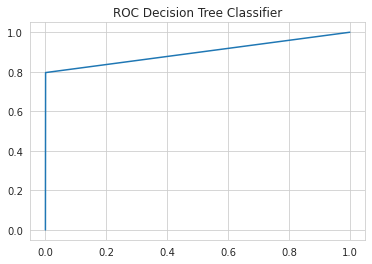

In [21]:
prob_dt = decision_tree.predict_proba(X_test)
fpr_dt, tpr_dt, thresh_dt = roc_curve(y_test, prob_dt[:,1], pos_label=1)
random_probs_dt = [0 for i in range(len(y_test))]
p_fpr_dt, p_tpr_dt, _ = roc_curve(y_test, random_probs_dt, pos_label=1)
plt.title('ROC Decision Tree Classifier')
plt.plot(fpr_dt,tpr_dt)
plt.show()
auc_dt = roc_auc_score(y_test, prob_dt[:,1])

### Random Forest Classifier

In [22]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_rf=accuracy_score(y_test,y_pred)
prec_rf,recall_rf,f1_rf,support_rf=precision_recall_fscore_support(y_test, y_pred, average='weighted')
log_rf=log_loss(y_test,y_pred)
kappa_rf=cohen_kappa_score(y_test, y_pred)
ngini_rf= gini_normalized(y_test, y_pred)

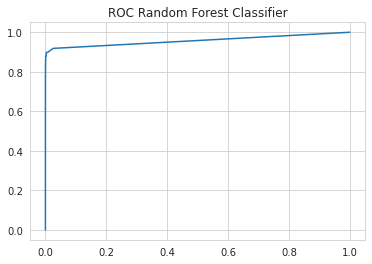

In [23]:
prob_rf = random_forest.predict_proba(X_test)
fpr_rf ,tpr_rf, thresh_rf = roc_curve(y_test, prob_rf[:,1], pos_label=1)
random_probs_rf = [0 for i in range(len(y_test))]
p_fpr_rf, p_tpr_rf, _ = roc_curve(y_test, random_probs_rf, pos_label=1)
plt.title('ROC Random Forest Classifier')
plt.plot(fpr_rf,tpr_rf)
plt.show()
auc_rf = roc_auc_score(y_test, prob_rf[:,1])

### Support Vector Machines

In [24]:
svm=SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc_svm=accuracy_score(y_test,y_pred)
prec_svm,recall_svm,f1_svm,support_svm=precision_recall_fscore_support(y_test, y_pred, average='weighted')
log_svm=log_loss(y_test,y_pred)
kappa_svm=cohen_kappa_score(y_test, y_pred)
ngini_svm= gini_normalized(y_test, y_pred)

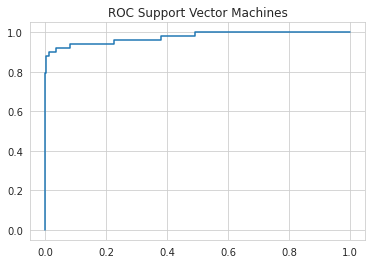

In [25]:
prob_svm = svm.predict_proba(X_test)
fpr_svm, tpr_svm, thresh_svm = roc_curve(y_test, prob_svm[:,1], pos_label=1)
random_probs_svm = [0 for i in range(len(y_test))]
p_fpr_svm, p_tpr_svm, _ = roc_curve(y_test, random_probs_svm, pos_label=1)
plt.title('ROC Support Vector Machines')
plt.plot(fpr_svm,tpr_svm)
plt.show()
auc_svm = roc_auc_score(y_test, prob_svm[:,1])

### K-Nearest Neighbours

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn=accuracy_score(y_test,y_pred)
prec_knn,recall_knn,f1_knn,support_knn=precision_recall_fscore_support(y_test, y_pred, average='weighted')
log_knn=log_loss(y_test,y_pred)
kappa_knn=cohen_kappa_score(y_test, y_pred)
ngini_knn= gini_normalized(y_test, y_pred)

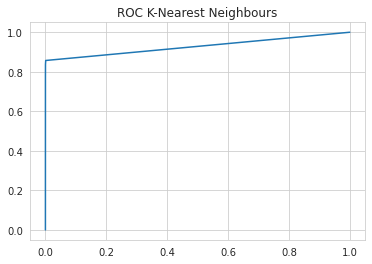

In [30]:
prob_knn = knn.predict_proba(X_test)
fpr_knn ,tpr_knn, thresh_knn = roc_curve(y_test, prob_knn[:,1], pos_label=1)
random_probs_knn = [0 for i in range(len(y_test))]
p_fpr_knn, p_tpr_knn, _ = roc_curve(y_test, random_probs_knn, pos_label=1)
plt.title('ROC K-Nearest Neighbours')
plt.plot(fpr_knn,tpr_knn)
plt.show()
auc_knn = roc_auc_score(y_test, prob_knn[:,1])

# Summary

In [31]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes','Stochastic Gradient Decent','Support Vector Machines','Decision Tree', 'Random Forest','KNN'],
    'Accuracy': [acc_log,acc_nb,acc_sgd,acc_svm,acc_dt,acc_rf,acc_knn],
    'Precision': [prec_log,prec_nb,prec_sgd,prec_svm,prec_dt,prec_rf,prec_knn],
    'Recall': [recall_log,recall_nb,recall_sgd,recall_svm,recall_dt,recall_rf,recall_knn],
    'F1 Score':[f1_log,f1_nb,f1_sgd,f1_svm,f1_dt,f1_rf,f1_knn],
    'Log Loss': [log_log,log_nb,log_sgd,log_svm,log_dt,log_rf,log_knn],
    'Normalized GINI Score': [ngini_log,ngini_nb,ngini_sgd,ngini_svm,ngini_dt,ngini_rf,ngini_knn],
    'Kappa Score': [kappa_log,kappa_nb,kappa_sgd,kappa_svm,kappa_dt,kappa_rf,kappa_knn],
    'AUC Score': [auc_log,auc_nb,auc_sgd,auc_svm,auc_dt,auc_rf,auc_knn]
})
models

,Model,Accuracy,Precision,Recall,F1 Score,Log Loss,Normalized GINI Score,Kappa Score,AUC Score
0,Logistic Regression,0.999122,0.999070,0.999122,0.999089,0.030318,0.637645,0.724838,0.981193
1,Naive Bayes,0.977915,0.998137,0.977915,0.987319,0.762803,0.837732,0.114976,0.953661
2,Stochastic Gradient Decent,0.999052,0.998994,0.999052,0.999016,0.032743,0.603056,0.702825,0.974143
3,Support Vector Machines,0.999403,0.999374,0.999403,0.999380,0.020616,0.764326,0.812890,0.974943
4,Decision Tree,0.999087,0.999148,0.999087,0.999113,0.031531,0.788374,0.749544,0.897678
5,Random Forest,0.999473,0.999460,0.999473,0.999465,0.018191,0.817817,0.841842,0.957684
6,KNN,0.999403,0.999374,0.999403,0.999380,0.020616,0.764326,0.812890,0.928456
